In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from skimage import io


Step (1) : Reading the data. 


In [3]:
def loadMatData(path):
  datavar = loadmat(path)
  return datavar['X'], datavar['y']

train_X, train_y = loadMatData('/content/drive/MyDrive/Colab Notebooks/Assignment 5 SML/train_32x32.mat')

test_X , test_y = loadMatData('/content/drive/MyDrive/Colab Notebooks/Assignment 5 SML/test_32x32.mat')


print("Shape of the training data", train_X.shape , train_y.shape )
print("Shape of the testting data", test_X.shape, test_y.shape)

Shape of the training data (73257, 32, 32, 3) (73257, 1)
Shape of the testting data (26032, 32, 32, 3) (26032, 1)


Step (2) : Normalizing those just images i.e., only X values. Where as y is labels.

Min Max Normalization

In [4]:
train_X = train_X/255.0
test_X = test_X/255.0


Applying one-hot vector encoding for the labels i.e., y

In [5]:
from sklearn.preprocessing import OneHotEncoder


encoder_Object = OneHotEncoder().fit(train_y.reshape(-1, 1))
#made an encoder object

#now we can transform all the label values 
train_y = encoder_Object.transform(train_y.reshape(-1, 1)).toarray()
test_y = encoder_Object.transform(test_y.reshape(-1, 1)).toarray()

In [6]:
print("Training set y labels", train_y.shape)
print("Testing set y labels ", test_y.shape)

Training set y labels (73257, 10)
Testing set y labels  (26032, 10)


In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Step (3) : Building the model as per the Given Architecture


In [8]:
modelObject = models.Sequential()

modelObject.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3), padding = "same"))
modelObject.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
modelObject.add(layers.Conv2D(64, (5, 5), activation='relu', padding="same"))
modelObject.add(layers.MaxPooling2D((2, 2), strides=(2,2)))
modelObject.add(layers.Conv2D(128, (5, 5), activation='relu', padding="same"))

modelObject.add(layers.Flatten())
modelObject.add(layers.Dense(3072, activation='relu'))
modelObject.add(layers.Dense(2048, activation='relu'))
modelObject.add(layers.Dense(10, activation='softmax'))

This is the summary of the CNN model constructed.

In [9]:
modelObject.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
sgdOptimizerObject = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
modelObject.compile(loss='categorical_crossentropy', optimizer=sgdOptimizerObject, metrics= ["accuracy"])

Step (4) : Training the model using SGD optimizer.

In [12]:
allHistoryData = modelObject.fit(train_X, train_y, epochs=6, validation_data=(test_X, test_y))

Epoch 1/6
2290/2290 [==============================] - 1111s 485ms/step - loss: 1.8482 - accuracy: 0.3561 - val_loss: 0.9645 - val_accuracy: 0.7045
Epoch 2/6
2290/2290 [==============================] - 1109s 484ms/step - loss: 0.6129 - accuracy: 0.8177 - val_loss: 0.5408 - val_accuracy: 0.8490
Epoch 3/6
2290/2290 [==============================] - 1122s 490ms/step - loss: 0.4360 - accuracy: 0.8717 - val_loss: 0.5374 - val_accuracy: 0.8405
Epoch 4/6
2290/2290 [==============================] - 1108s 484ms/step - loss: 0.3563 - accuracy: 0.8957 - val_loss: 0.3944 - val_accuracy: 0.8868
Epoch 5/6
2290/2290 [==============================] - 1108s 484ms/step - loss: 0.2991 - accuracy: 0.9132 - val_loss: 0.4301 - val_accuracy: 0.8790
Epoch 6/6
2290/2290 [==============================] - 1119s 489ms/step - loss: 0.2562 - accuracy: 0.9255 - val_loss: 0.4064 - val_accuracy: 0.8810


For plotting test data accuracy and training data accuracy.

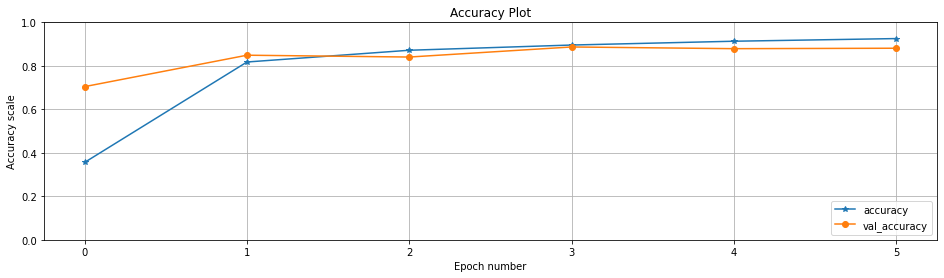

In [33]:
import matplotlib.pyplot as plt



plt.plot(allHistoryData.history['accuracy'], label='accuracy', marker = '*')
plt.plot(allHistoryData.history['val_accuracy'], label = 'val_accuracy', marker = 'o')

plt.xlabel('Epoch number')
plt.ylabel('Accuracy scale')
plt.title("Accuracy Plot")

plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()
plt.show()

For plotting Learning errors and training data errors.

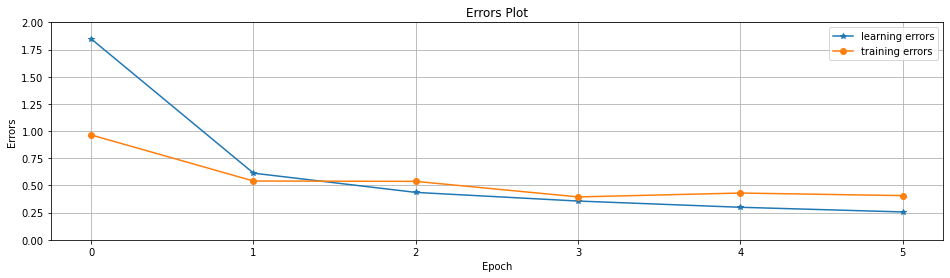

In [34]:
plt.plot(allHistoryData.history['loss'], label='learning errors', marker = '*')
plt.plot(allHistoryData.history['val_loss'], label = 'training errors', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.title("Errors Plot")

plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [35]:
error_testData, accuracy_testData = modelObject.evaluate(test_X,  test_y, verbose=2)

814/814 - 86s - loss: 0.4064 - accuracy: 0.8810 - 86s/epoch - 105ms/step
